# WELCOME TO THE NOTEBOOK
---

Importing Modules

In [4]:
import pandas as pd

Loading the data

In [5]:
data = pd.read_json('movies_dataset.json')
data.head(4)

,color,director_name,num_critic_for_reviews,duration,gross,genres,star_name,movie_title,movie_imdb_link,language,country,budget,title_year,imdb_score
0,Color,James Cameron,723.0,178.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,English,USA,237000000.0,2009.0,7.9
1,Color,Gore Verbinski,302.0,169.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,English,USA,300000000.0,2007.0,7.1
2,Color,Sam Mendes,602.0,148.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,English,UK,245000000.0,2015.0,6.8
3,Color,Christopher Nolan,813.0,164.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,English,USA,250000000.0,2012.0,8.5


Check the dataframe shape (#rows and #columns)

In [6]:
data.shape

(5043, 14)

Let's check the data types of the columns

In [7]:
data.dtypes

color                      object
director_name              object
num_critic_for_reviews    float64
duration                  float64
gross                     float64
genres                     object
star_name                  object
movie_title                object
movie_imdb_link            object
language                   object
country                    object
budget                    float64
title_year                float64
imdb_score                float64
dtype: object

Column Selection

In [8]:
# data.color
data['color']

0       Color
1       Color
2       Color
3       Color
4         NaN
        ...  
5038    Color
5039    Color
5040    Color
5041    Color
5042    Color
Name: color, Length: 5043, dtype: object

---

## Data Preparation
Remove some columns:    
   
   - `movie_imdb_link`
   - `num_critic_for_reviews`
   - `genre`

In [9]:
data.drop(axis = 1 , columns = ['movie_imdb_link'] , inplace = True)
data.head(2)

,color,director_name,num_critic_for_reviews,duration,gross,genres,star_name,movie_title,language,country,budget,title_year,imdb_score
0,Color,James Cameron,723.0,178.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,English,USA,237000000.0,2009.0,7.9
1,Color,Gore Verbinski,302.0,169.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,English,USA,300000000.0,2007.0,7.1


Exercise: Remove the rest of the columns 


In [10]:
data.drop(axis = 1 , columns=['num_critic_for_reviews', 'genres'] , inplace = True)
data.head(2)

,color,director_name,duration,gross,star_name,movie_title,language,country,budget,title_year,imdb_score
0,Color,James Cameron,178.0,760505847.0,CCH Pounder,Avatar,English,USA,237000000.0,2009.0,7.9
1,Color,Gore Verbinski,169.0,309404152.0,Johnny Depp,Pirates of the Caribbean: At World's End,English,USA,300000000.0,2007.0,7.1


Let's check the shape again

In [11]:
data.shape

(5043, 11)

Let's convert the dtype of `title_year` column to integer

In [12]:
data.title_year = data.title_year.astype('Int64')


Let's check the dataframe again

In [13]:
data.head(2)

,color,director_name,duration,gross,star_name,movie_title,language,country,budget,title_year,imdb_score
0,Color,James Cameron,178.0,760505847.0,CCH Pounder,Avatar,English,USA,237000000.0,2009,7.9
1,Color,Gore Verbinski,169.0,309404152.0,Johnny Depp,Pirates of the Caribbean: At World's End,English,USA,300000000.0,2007,7.1


Renaming some columns: 
- changing `gross` to `movie_income`

In [14]:
rename_dict = {'gross'  : "movie_income" , 'language': 'Language' }

data.rename(columns = rename_dict , inplace = True)
data.head(2)

,color,director_name,duration,movie_income,star_name,movie_title,Language,country,budget,title_year,imdb_score
0,Color,James Cameron,178.0,760505847.0,CCH Pounder,Avatar,English,USA,237000000.0,2009,7.9
1,Color,Gore Verbinski,169.0,309404152.0,Johnny Depp,Pirates of the Caribbean: At World's End,English,USA,300000000.0,2007,7.1


Exercise: Rename the `budget` column to `movie_budget`

In [15]:
rename_dict = {'budget'  : "movie_budget" }

data.rename(columns = rename_dict , inplace = True)
data.head(2)

,color,director_name,duration,movie_income,star_name,movie_title,Language,country,movie_budget,title_year,imdb_score
0,Color,James Cameron,178.0,760505847.0,CCH Pounder,Avatar,English,USA,237000000.0,2009,7.9
1,Color,Gore Verbinski,169.0,309404152.0,Johnny Depp,Pirates of the Caribbean: At World's End,English,USA,300000000.0,2007,7.1


---
### Data Analysis 


Let's checkout the distribution of `duration` column using a histogram.


Text(0.5, 1.0, 'Movi duartion Histogram')

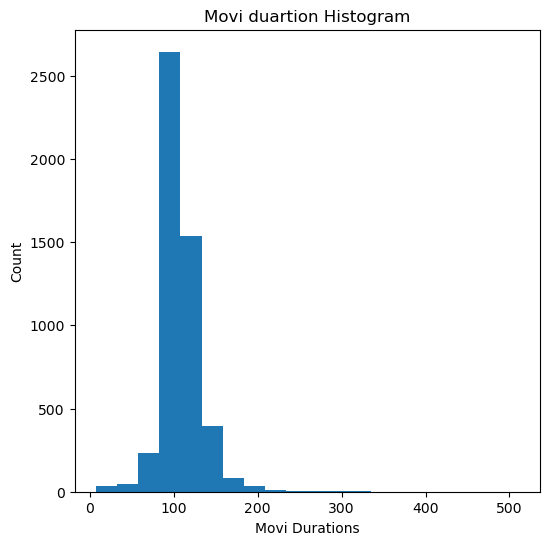

In [16]:
ax = data.duration.hist(bins =20 , figsize = (6,6) ,grid =False)
ax.set_xlabel('Movi Durations')
ax.set_ylabel("Count")
ax.set_title("Movi duartion Histogram")

Exercise: Create a hitogram to see the distribution of `imdb_score` column

Text(0, 0.5, 'Count')

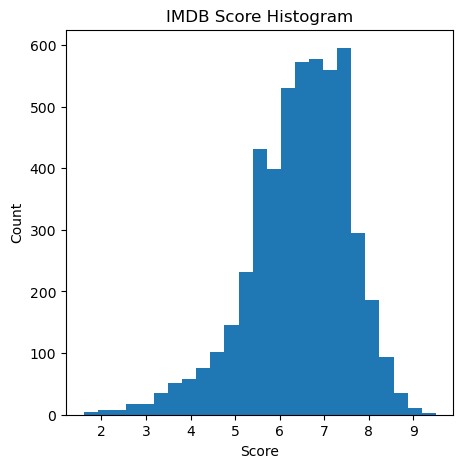

In [17]:
ax = data.imdb_score.hist(bins=25 , grid = False   , figsize = (5,5))
ax.set_title("IMDB Score Histogram")
ax.set_xlabel("Score")
ax.set_ylabel("Count")




Let's check how many movies have the `imdb_score` less than `4`.

In [18]:
low_score_movies=  data[data['imdb_score'] < 4]

In [19]:
low_score_movies.shape

(156, 11)

Exercise: Use a histogram to visualize the distribution of movie IMdb score in that are produced in `USA`.

Text(0, 0.5, 'Count')

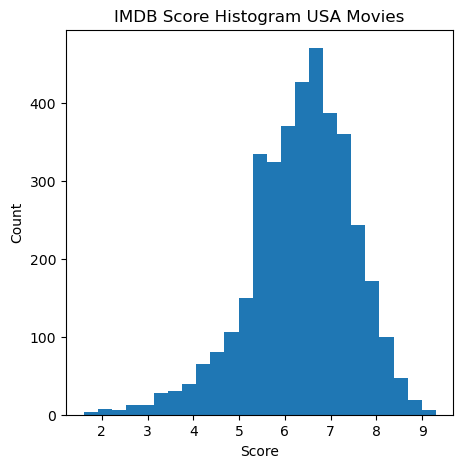

In [20]:

usa_movies = data[data.country == 'USA']
ax = usa_movies.imdb_score.hist(bins=25 , grid = False   , figsize = (5,5))
ax.set_title("IMDB Score Histogram USA Movies")
ax.set_xlabel("Score")
ax.set_ylabel("Count")



---
### Let's answer to some analytical questions 
    
Question 1 - In which year we have the `highest` and `lowest` number of movies?

Now finding out number of movies per year

In [37]:
# movies_per_year = data.groupby(['title_year']).count()
# movies_per_year [movies_per_year.movie_title == movies_per_year.movie_title.max()]
# movies_per_year [movies_per_year.movie_title == movies_per_year.movie_title.min()]
# OR
movies_per_year = data.groupby(['title_year']).size()
print(f'Max num of movies Year: {movies_per_year.idxmax()}\nMin num of movies Year: {movies_per_year.idxmin()}')


Max num of movies Year: 2009
Min num of movies Year: 1916


Let's create a line chart to show the result

Text(0.5, 1.0, 'Number of movies Per Year')

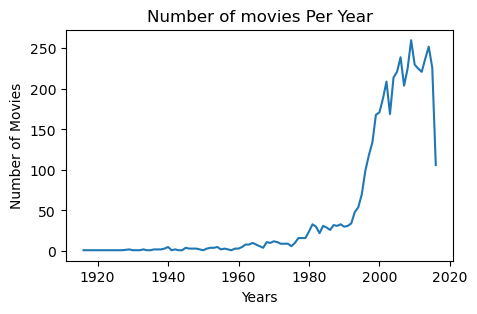

In [44]:
line_chart = movies_per_year.plot.line(figsize=(5,3))
line_chart.set_xlabel("Years")
line_chart.set_ylabel("Number of Movies")
line_chart.set_title("Number of movies Per Year")

In [94]:
data.head(2)

,color,director_name,duration,movie_income,star_name,movie_title,Language,country,movie_budget,title_year,imdb_score
0,Color,James Cameron,178.0,760505847.0,CCH Pounder,Avatar,English,USA,237000000.0,2009,7.9
1,Color,Gore Verbinski,169.0,309404152.0,Johnny Depp,Pirates of the Caribbean: At World's End,English,USA,300000000.0,2007,7.1


Question 2 - In which year we have `minimum` and `maximum` average `imdb_score` ? 

In [131]:
# data[data.imdb_score == data.imdb_score.max()]
min_max_score = data[data.imdb_score == data.imdb_score.min()]
min_max_score.title_year

2834    2011
Name: title_year, dtype: Int64

Finding average imdb score per year 

In [46]:
mean_score = data.groupby(['title_year'])['imdb_score'].mean()
mean_score

title_year
1916    8.000000
1920    4.800000
1925    8.300000
1927    8.300000
1929    7.150000
          ...   
2012    6.266516
2013    6.369620
2014    6.228175
2015    6.033628
2016    6.399057
Name: imdb_score, Length: 91, dtype: float64

Let's Use a barchart to visualize the result

<AxesSubplot: title={'center': 'Avg IMDB Score per Year'}, xlabel='title_year', ylabel='avg Score'>

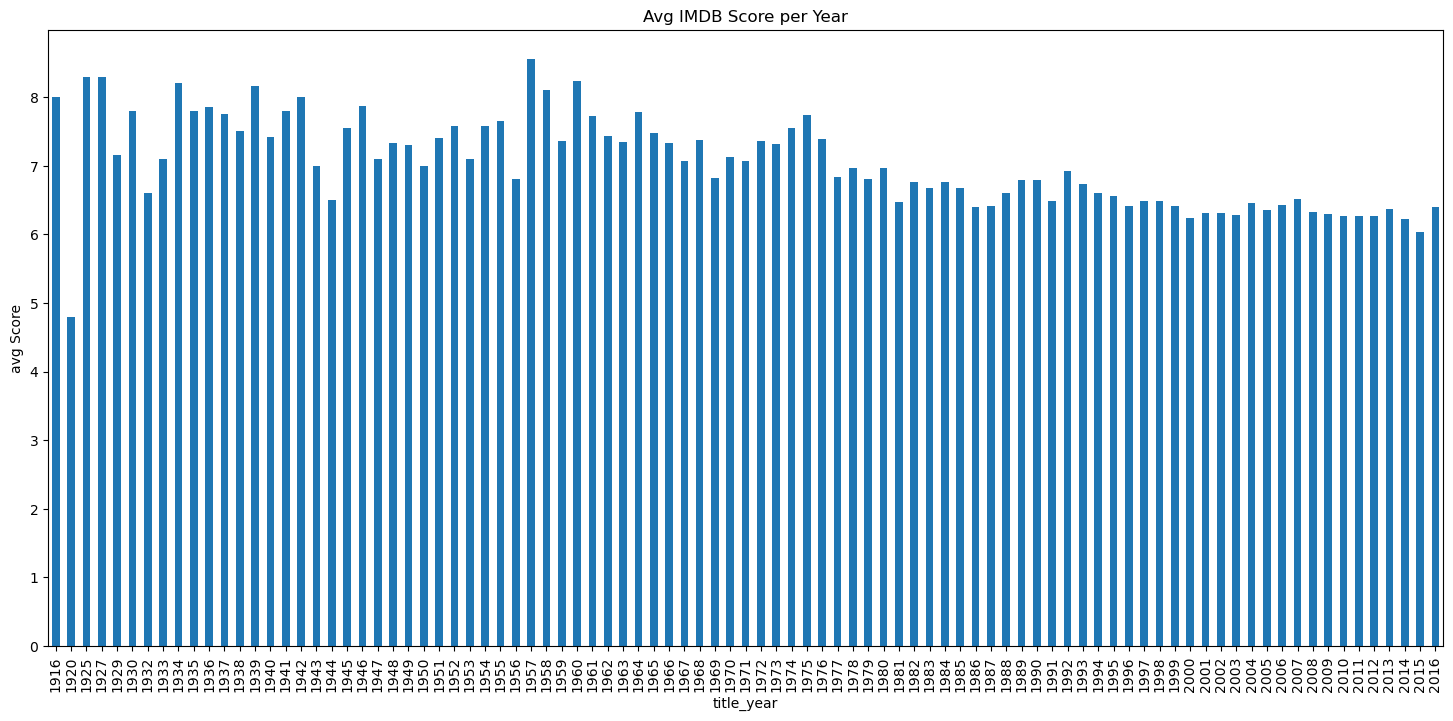

In [53]:
mean_score.plot.bar(figsize = (18,8) , title = "Avg IMDB Score per Year" , ylabel='avg Score')

Exercise: 
Question 3 - In which year we have the `minimum` and `maximum` spent movie budget?

`hint: use a line chart to visualize your results.` 

<AxesSubplot: xlabel='title_year'>

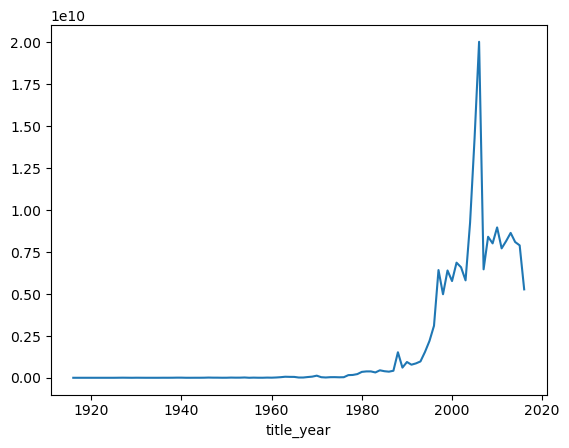

In [67]:
budget = data.groupby(by = ['title_year'])['movie_budget'].sum()
budget.plot()

Question 4 - Is there any relationship between IMdb score of a movie and the movie income?

To approaches to solve this question:
- Visual Correlation Analysis 
- Generating the Correlation Matirx

In [79]:
# data.head(2)
data_1 = data[['movie_income','imdb_score']]
data_1

,movie_income,imdb_score
0,760505847.0,7.9
1,309404152.0,7.1
2,200074175.0,6.8
3,448130642.0,8.5
4,NaN,7.1
...,...,...
5038,NaN,7.7
5039,NaN,7.5
5040,NaN,6.3
5041,10443.0,6.3


Let's drop the rows with `non` values

In [83]:
data_1.dropna(inplace=True)
data_1

,movie_income,imdb_score
0,760505847.0,7.9
1,309404152.0,7.1
2,200074175.0,6.8
3,448130642.0,8.5
5,73058679.0,6.6
...,...,...
5034,70071.0,6.3
5035,2040920.0,6.9
5037,4584.0,6.4
5041,10443.0,6.3


Let's create a scatter plot to see the data

<AxesSubplot: xlabel='movie_income', ylabel='imdb_score'>

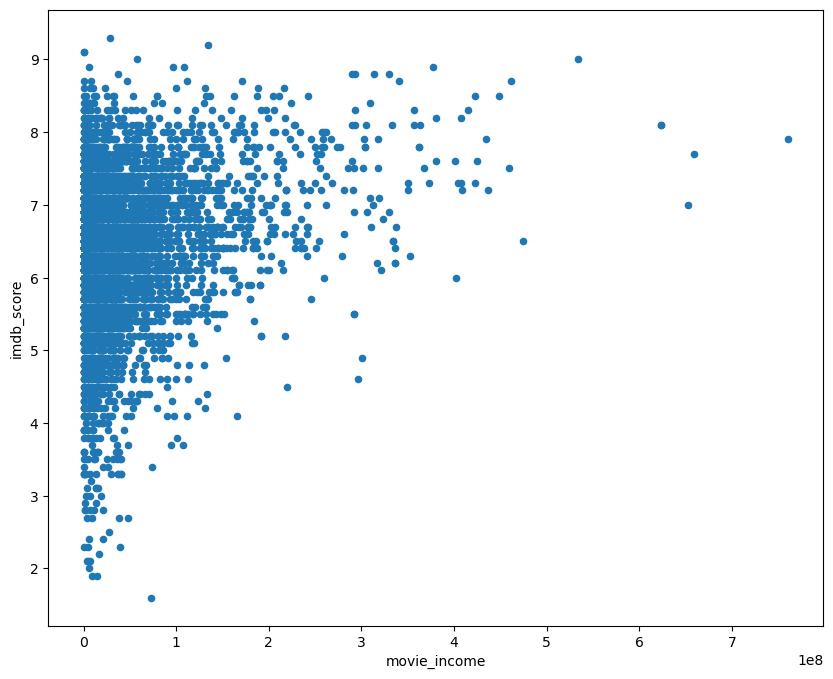

In [94]:
data_1.plot.scatter(x = 'movie_income' , y = 'imdb_score' , figsize = (10,8))

Let's generate the correlation matrix

In [90]:
data_1.corr()

,movie_income,imdb_score
movie_income,1.000000,0.198021
imdb_score,0.198021,1.000000


not a very good example of both imdb_score and income for each other as thry are only 19% dependent, we need max dependence to see correlation